Dans un premier temps on importe les librairies qu'il faut.

In [166]:
import numpy as np
import pandas as pd
import missingno as msno # Pour le graphe des données manquantes
import matplotlib.pyplot as plt
import seaborn as sns
import squarify # Pour les graphes des carrés
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

## Importation des données brutes
On importe les données brutes, toutes les observartions comprises, avec leurs attributs tels quels, y compris les observations contenant des valeurs manquantes.

In [101]:
names = ["age", "workclass", "fnlwgt", "education", "educationNr", "maritalStatus",
        "occupation", "relationship", "race", "sex", "capitalGain", "capitalLoss", 
         "hoursPerWeek", "nativeCountry", "salary"]


complete = pd.read_csv("complete.data", header = None, sep = " ", na_values = ["?"],
                       names = names)
complete.head(2)
complete.tail(2)
# complete.salary.value_counts()

,age,workclass,fnlwgt,education,educationNr,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,salary
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## Connaissance des données manquantes
Y a-t-il des valeurs manquantes, si oui où ?

In [3]:
complete.isnull().sum() 
complete.info() # Pareil, même plus d'infos.
# Peut également taper : complete.count(0)
# Dans les trois colonnes : "workclass', 'occupation' et 'nativeCountry'.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age              48842 non-null int64
workclass        46043 non-null object
fnlwgt           48842 non-null int64
education        48842 non-null object
educationNr      48842 non-null int64
maritalStatus    48842 non-null object
occupation       46033 non-null object
relationship     48842 non-null object
race             48842 non-null object
sex              48842 non-null object
capitalGain      48842 non-null int64
capitalLoss      48842 non-null int64
hoursPerWeek     48842 non-null int64
nativeCountry    47985 non-null object
salary           48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Encore mieux, on peut les tracer avec la librairie `missingno`.

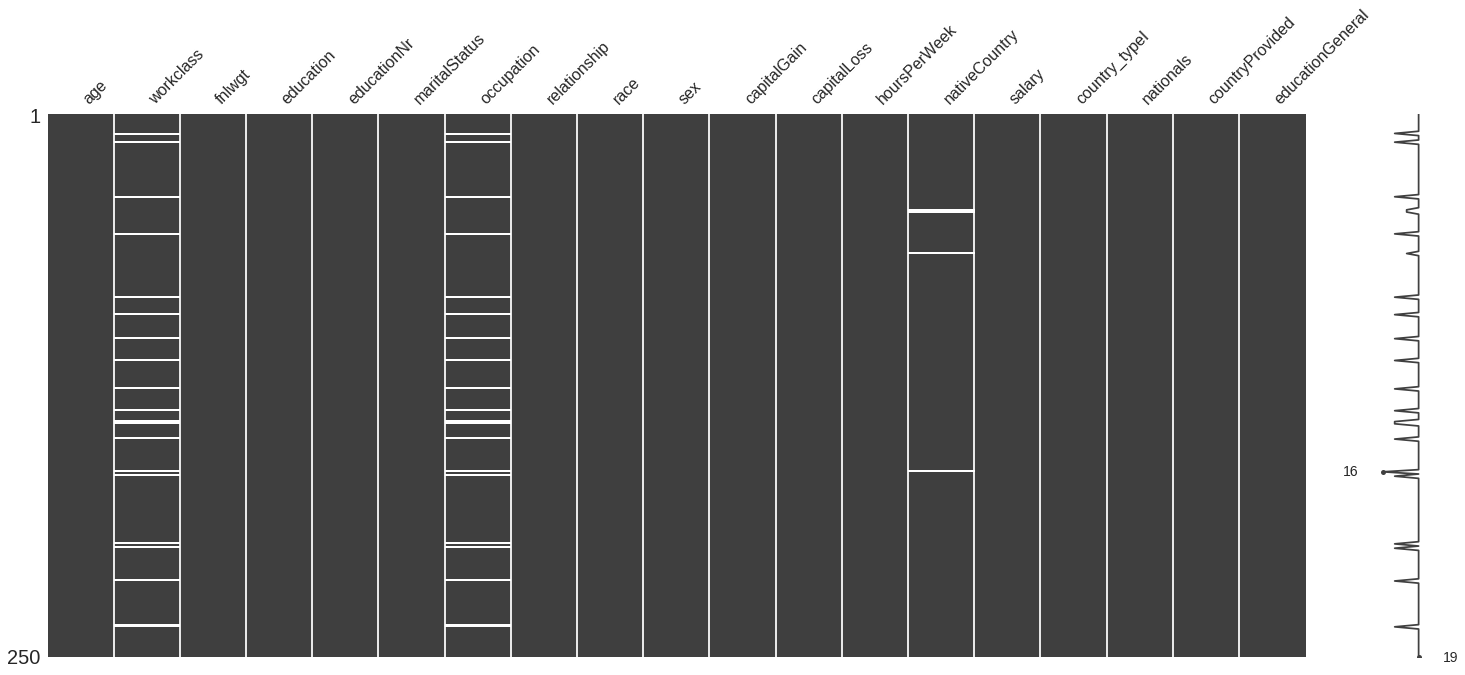

In [31]:
msno.matrix(complete.sample(250))

## Répartition des pays d'origine

Vérification d'une information à côté : est-le nom du pays "Outlying-US(Guam-USVI-etc)" vraiment appelé comme ça dans le jeu de données ?   
Réponse : oui.  
  
Et comment sont les pays répartis ?

In [25]:
(complete["nativeCountry"] == "Outlying-US(Guam-USVI-etc)").any() # Réponse : True.
complete.nativeCountry.value_counts()


United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

Encore mieux, on peut les tracer.

In [102]:
def drawSquarify(dataFrame, colnom, titre, palette):
    fig = plt.figure(figsize=(10, 5))
    carres = dataFrame[colnom].value_counts().to_frame()
    ax = fig.add_subplot(111, aspect="equal")
    ax = squarify.plot(sizes = carres[colnom].values, label = carres.index,
                  color=palette, alpha = 1)
    ax.set_xticks([])
    ax.set_yticks([])
    fig=plt.gcf()
    fig.set_size_inches(20, 15)
    plt.title(titre, 
              fontsize=18)
    plt.show()

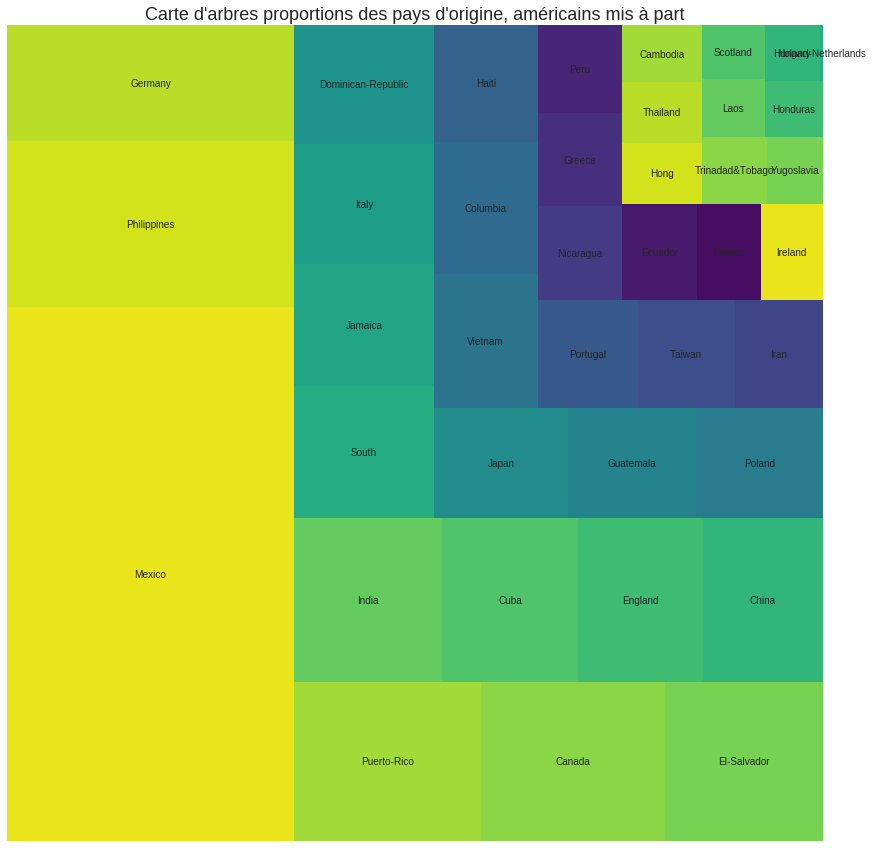

In [103]:
drawSquarify(dataFrame = complete[
    ~complete["nativeCountry"].isin(["United-States", "Outlying-US(Guam-USVI-etc)"])],
             colnom = "nativeCountry", titre = 
             "Carte d'arbres proportions des pays d'origine, américains mis à part",
            palette = sns.color_palette('viridis_r', 28))


On peut aussi visualiser les professions.

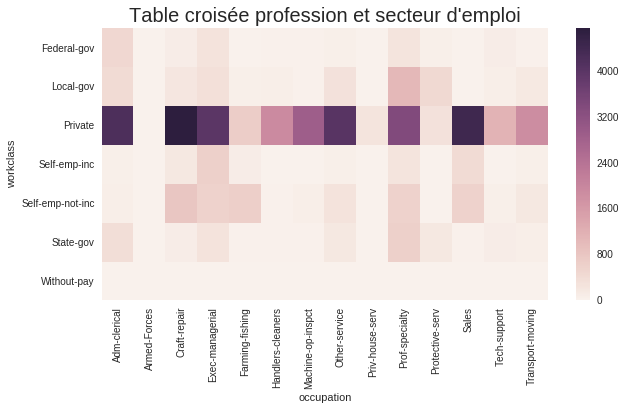

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,487,15,93,268,9,36,19,55,0,253,47,17,96,37
Local-gov,421,0,211,331,43,65,24,300,0,1061,450,16,58,156
Private,4208,0,4748,3995,670,1923,2882,4057,242,3409,299,4439,1154,1880
Self-emp-inc,47,0,167,617,82,6,17,42,0,245,5,420,9,38
Self-emp-not-inc,70,0,798,587,653,21,59,276,0,575,7,591,42,183
State-gov,375,0,94,287,25,19,19,191,0,629,175,20,87,60
Without-pay,3,0,1,1,8,2,2,2,0,0,0,1,0,1


In [79]:
# drawSquarify(dataFrame = complete, colnom = "occupation",
#              titre = "", palette = sns.color_palette('cubehelix_r', 28))
occupation_cross = pd.crosstab(complete["workclass"], complete["occupation"])

plt.figure(figsize=(10, 5))
sns.heatmap(occupation_cross)
plt.title("Table croisée profession et secteur d'emploi", fontsize = 20)
plt.show()
occupation_cross

On s'intéreserait peut-être à la question : les professions des américains et celles des étrangers sont-elles réparties très différemment ?

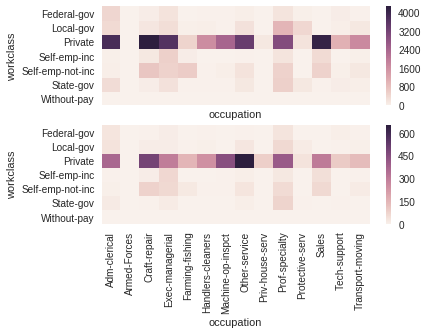

In [89]:
americans = complete.loc[complete["nativeCountry"].isin(
    ["United-States", "Outlying-US(Guam-USVI-etc)"])]
foreigners = complete.loc[~ complete["nativeCountry"].isin(
    ["United-States", "Outlying-US(Guam-USVI-etc)"])]


occupation_cross_american = pd.crosstab(americans["workclass"], americans["occupation"])
occupation_cross_foreigner = pd.crosstab(foreigners["workclass"], foreigners["occupation"])

plt.figure(figsize=(35, 20))
f, (ax1, ax2) = plt.subplots(2)
sns.heatmap(occupation_cross_american, ax = ax1, xticklabels = False)
sns.heatmap(occupation_cross_foreigner, ax = ax2)
#plt.title("Table croisée profession et secteur d'emploi", fontsize = 20)
plt.show()

## Une statistique descriptive sur les variables numériques

In [104]:
complete.describe()

,age,fnlwgt,educationNr,capitalGain,capitalLoss,hoursPerWeek
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Feature selection
Maintenant on va traiter les attributs. Tout d'abord, les noms du pays sont trop nombreux. On va les transformer en deux colonnes avant d'enlever cette variable selon les critères : 
    1. Le sujet est-il originaire d'un pays développé ?
    2. Le sujet est-il originaire américain (outre-mer comprise) ?
Ces deux nouvelles variables vont être directement codé en 0 et 1, accompagnée d'une troisième qui contient l'information si le sujet a ou n'a pas rensigné son pays d'origine.

In [105]:
# complete.drop(labels = "education", axis = 1, inplace = True)
# complete_num = pd.get_dummies(complete, columns = ["workclass", "educationNr", "maritalStatus",
#         "occupation", "relationship", "race", "sex", "nativeCountry", "salary"],
#                              dummy_na = True) 
# complete_num.head()
# complete_num.columns
print("New country variables are like following:\n")

complete["countryProvided"] = (~ complete["nativeCountry"].isnull()) * 1
print("NA or not? Not missing is 1.\n", complete["countryProvided"].value_counts())

complete["country_typeI"] = complete["nativeCountry"].isin(["United-States",
            "England", "Canada", "Outlying-US(Guam-USVI-etc)", "Japan", "Greece", "South",
                "Italy", "Portugal", "Ireland", "France", "Taiwan", "Scotland",
                    "Hong", "Holand-Netherlands"]) * 1
print("\nDevelopped country or not? ('not' includes original NAs)\n", 
      complete["country_typeI"].value_counts())

complete["nationals"] = complete["nativeCountry"].isin(["United-States", 
                                                         "Outlying-US(Guam-USVI-etc)"]) * 1
print("\nAmerican national or not? Americain is 1. 'not' includes original NAs.\n", 
      complete["nationals"].value_counts())
# print(complete["educationNr"].value_counts())
# print(complete["education"].value_counts())


New country variables are like following:

NA or not? Not missing is 1.
 1    47985
0      857
Name: countryProvided, dtype: int64

Developped country or not? ('not' includes original NAs)
 1    44784
0     4058
Name: country_typeI, dtype: int64

American national or not? Americain is 1. 'not' includes original NAs.
 1    43855
0     4987
Name: nationals, dtype: int64


Maintenant on s'interesse à redéfinir l'échelle de la variable 'educationNr'. La raison est expliquée dans le rapport.

In [106]:
def numericEducation (x):
    if x in range(1, 5): 
        return 0 
    elif x in range(5, 9): 
        return 0.03125
    elif x == 9: 
        return 0.0625
    elif x in range(10, 13): 
        return 0.125
    elif x == 13: 
        return 0.25
    elif x == 14: 
        return 0.5
    elif x in range (15, 17):
        return 1
    else:
        return np.nan


complete["educationGeneral"] = complete["educationNr"].map(numericEducation)
complete["educationGeneral"].value_counts()

0.06250    15784
0.12500    14540
0.25000     8025
0.03125     4614
0.50000     2657
0.00000     1794
1.00000     1428
Name: educationGeneral, dtype: int64

On peut poser la question : est-il pertinant de mettre 'educationNr = 15' et 'education = 16' ensemble ? Vu que ces derniers sont des profs ?   
D'un point de vue de salaire, oui. 

In [107]:
print("Répartition du salaire pour les formations niveau 15 :\n", 
      complete.loc[complete['educationNr'] == 15, "salary"].value_counts())
print("\nRépartition du salaire pour les formations niveau 16 :\n", 
      complete.loc[complete['educationNr'] == 16, "salary"].value_counts())

Répartition du salaire pour les formations niveau 15 :
 >50K     617
<=50K    217
Name: salary, dtype: int64

Répartition du salaire pour les formations niveau 16 :
 >50K     431
<=50K    163
Name: salary, dtype: int64


Quelques statistiques des variables catégoriques.

In [126]:
complete.relationship.value_counts() # husbands the most, much more than wives, followed by not-in-family
complete.maritalStatus.value_counts() # married-civ-spouse followed by never-married
complete.workclass.value_counts() # private much more than the follower
complete.occupation.value_counts() # relqtively balanced
complete["salary"].value_counts() # fewer >50K
complete["sex"].value_counts() # fewer females
complete.race.value_counts() # mostly white
complete.education.value_counts() # Most people only have high school grade or some college.
# complete.educationGeneral.value_counts() # Reflects nearly the same situation.

0.06250    15784
0.12500    14540
0.25000     8025
0.03125     4614
0.50000     2657
0.00000     1794
1.00000     1428
Name: educationGeneral, dtype: int64

## Pré-traitement

In [165]:
complete_preprocessed = complete.copy(deep = True)

# For multi-level categorical variables which contain missing values:
# We transform the column in one-hot form.
# We don't explicitely set a factor for missing values, but they are the only
# ones that have a 0 everywhere. Therefore, this information is kept
# in other columns.
if "workclass" in complete_preprocessed.columns.values:
    complete_preprocessed = pd.get_dummies(complete_preprocessed, columns = ["workclass"])
if "occupation" in complete_preprocessed.columns.values:
    complete_preprocessed = pd.get_dummies(complete_preprocessed, columns = ["occupation"])
if "salary" in complete_preprocessed.columns.values:
    complete_preprocessed = pd.get_dummies(complete_preprocessed, columns = ["salary"])
    
# For multi-level categorical variables which DON'T contain missing values:
# We transform the column in one-hot form.
# Knowing that there will be a factor being redundant afterwards, we'll delete
# the factor that contains the most of observations.
if "maritalStatus" in complete_preprocessed.columns.values:
    complete_preprocessed = pd.get_dummies(complete_preprocessed, 
                                           columns = ["maritalStatus"])
    complete_preprocessed.drop("maritalStatus_Married-civ-spouse", axis = 1, inplace = True)
    
if "relationship" in complete_preprocessed.columns.values:
    complete_preprocessed = pd.get_dummies(complete_preprocessed, 
                                           columns = ["relationship"])
    complete_preprocessed.drop("relationship_Husband", axis = 1, inplace = True)

if "race" in complete_preprocessed.columns.values:
    complete_preprocessed = pd.get_dummies(complete_preprocessed, 
                                           columns = ["race"])
    complete_preprocessed.drop("race_White", axis = 1, inplace = True)
    
# For binary variables, we only need one single column as result.
if "sex" in complete_preprocessed.columns.values:
    complete_preprocessed["isFemale"] = (complete_preprocessed["sex"] == "Female") * 1
    complete_preprocessed.drop("sex", axis = 1, inplace = True)

# Now that we have transformed all categorical columns, let's remove
# the old ones left.
if "education" in complete_preprocessed.columns.values:
    complete_preprocessed.drop("education", axis = 1, inplace = True)
if "educationNr" in complete_preprocessed.columns.values:
    complete_preprocessed.drop("educationNr", axis = 1, inplace = True)
if "nativeCountry" in complete_preprocessed.columns.values:
    complete_preprocessed.drop("nativeCountry", axis = 1, inplace = True)
# And "fnlwgt" for which we aren't sure what it means.
if "fnlwgt" in complete_preprocessed.columns.values:
    complete_preprocessed.drop("fnlwgt", axis = 1, inplace = True)
    
complete_preprocessed.columns.values
# complete_preprocessed.columns.size # 48
# complete_preprocessed._get_numeric_data().columns.size # 48 too. So we are fine.
complete_preprocessed.head()

,age,capitalGain,capitalLoss,hoursPerWeek,countryProvided,country_typeI,nationals,educationGeneral,workclass_Federal-gov,workclass_Local-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,isFemale
0,25,0,0,40,1,1,1,0.03125,0,0,...,0,0,1,0,0,0,0,1,0,0
1,38,0,0,50,1,1,1,0.06250,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28,0,0,40,1,1,1,0.12500,0,1,...,0,0,0,0,0,0,0,0,0,0
3,44,7688,0,40,1,1,1,0.12500,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,0,0,30,1,1,1,0.12500,0,0,...,0,0,1,0,0,0,0,0,0,1


## Normalisation des variables 

In [167]:
min_max_scaler = MinMaxScaler()
complete_preprocessed[["age", "capitalGain", "capitalLoss", "hoursPerWeek"]] = \
    min_max_scaler.fit_transform(complete_preprocessed[["age", "capitalGain", 
                                                        "capitalLoss", "hoursPerWeek"]])
    
complete_preprocessed.head()

,age,capitalGain,capitalLoss,hoursPerWeek,countryProvided,country_typeI,nationals,educationGeneral,workclass_Federal-gov,workclass_Local-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,isFemale
0,0.109589,0.000000,0.0,0.397959,1,1,1,0.03125,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0.287671,0.000000,0.0,0.500000,1,1,1,0.06250,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.150685,0.000000,0.0,0.397959,1,1,1,0.12500,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.369863,0.076881,0.0,0.397959,1,1,1,0.12500,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.013699,0.000000,0.0,0.295918,1,1,1,0.12500,0,0,...,0,0,1,0,0,0,0,0,0,1


## Correlation deux-à-deux entres les variables

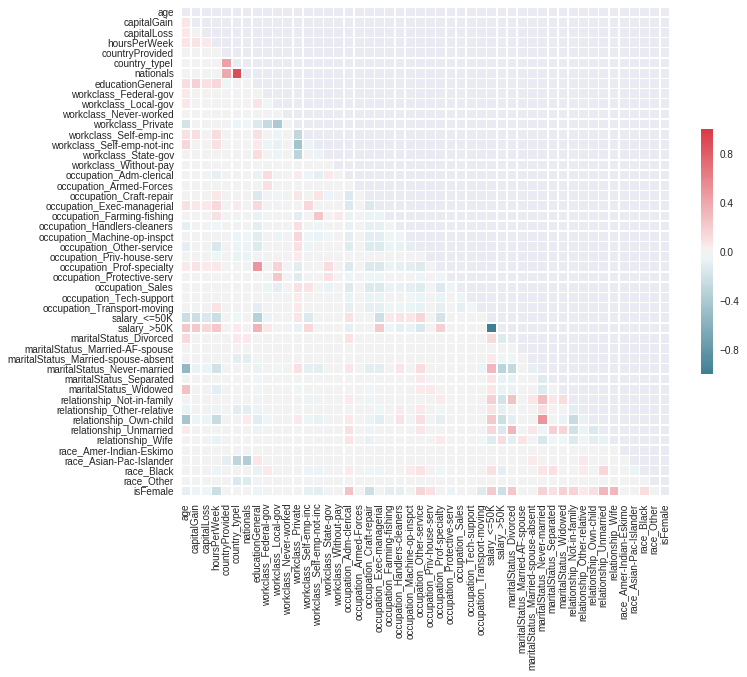

In [168]:
# Compute the correlation matrix
corr = complete_preprocessed.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

On peut détecter des relations linéaires deux-à-deux intéressantes, par exemple les non-mariés se trouvent notamment chez les femmes. (corrélation élevée positive entre "isFemale" et "relationship_Unmarried", visiblement voire plus forte que celle entre "isFemale" et "relationship_Wife")

Finalement on sauvegarde les jeu de données original et pré-traité.

In [169]:
complete.to_pickle("complete")
complete_preprocessed.to_pickle("preprocessed")

## No use. A supprimer après

In [62]:
from sklearn.linear_model import LinearRegression, LogisticRegression
logreg = LogisticRegression(C=1e5)
regr = LinearRegression()

logreg.fit(df_num["age"].reshape(-1, 1), df_num["salary_>50K"])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


/usr/bin/usr/bin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## D'autres jeux de données 
Le dossier nous a proposé également d'autres formes de ce jeu de données. On pourrait les charger pour faciliter certaines tâches.

In [46]:
namesNoCountry = names
namesNoCountry.pop(-2)


nomissing =  pd.read_csv("nomissing.data", header = None, sep = " ", names = namesNoCountry)
nomissing.head()
# nomissing.tail()
# print(nomissing.shape)
# print(48841 * .93)
# print(nomissing.isnull().any())
# print(nomissing["salary"].value_counts())

,age,workclass,fnlwgt,education,educationNr,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,<=50K


In [34]:
train =  pd.read_csv("train.data", header = None, sep = " ", na_values = ["?"], names = names)
train.tail()
train.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
dtype: bool

In [42]:
test =  pd.read_table("test.data", header = None, sep = ",") ## The adult.test file may be read by a notebook.
# It's preceded by a remark, which must be deleted manually in advance.
test.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [48]:
nomissing.drop(labels = "education", axis = 1, inplace = True)
df_num = pd.get_dummies(nomissing, columns = ["workclass", "educationNr", "maritalStatus",
        "occupation", "relationship", "race", "sex", "salary"]) 

In [49]:
df_num.head()

,age,fnlwgt,capitalGain,capitalLoss,hoursPerWeek,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,salary_<=50K,salary_>50K
0,25,226802,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
1,38,89814,0,0,50,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
2,28,336951,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,44,160323,7688,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
4,34,198693,0,0,30,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0


In [50]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df_num[["age", "fnlwgt", "capitalGain", "capitalLoss", "hoursPerWeek"]] = \
    min_max_scaler.fit_transform(df_num[["age", "fnlwgt", "capitalGain", "capitalLoss", "hoursPerWeek"]])
    
df_num.head()

,age,fnlwgt,capitalGain,capitalLoss,hoursPerWeek,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,salary_<=50K,salary_>50K
0,0.109589,0.144430,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
1,0.287671,0.051677,0.000000,0.0,0.500000,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
2,0.150685,0.219011,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,0.369863,0.099418,0.076881,0.0,0.397959,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0.232877,0.125398,0.000000,0.0,0.295918,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0


In [62]:
df_num.to_pickle("preprocessed")

# to read it back here: nom_df = pd.read_hdf("preprocessed", "df1")



## Utilisation de R dans Jupyter Notebook
Une note, à supprimer après

In [2]:
%load_ext rpy2.ipython

%R  X <- c(1, 3); sd(X)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: During startup - 
  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 1: Setting LC_TIME failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 2: Setting LC_MONETARY failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 3: Setting LC_PAPER failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 4: Setting LC_MEASUREMENT failed, using "C" 

  warning

array([1.41421356])

In [30]:
%%R
install.packages("VIM")
library(VIM)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: trying URL 'https://cran.usthb.dz/src/contrib/VIM_4.7.0.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning:  length 330025 bytes (322 KB)

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: downloaded 322 KB


  warnings.warn(x, RRuntimeWarning)



Error in FUN(X[[i]], ...) : 
  lazy-load database '/home/ubuntu/anaconda3/lib/R/library/datasets/data/Rdata.rdb' is corrupt


/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The downloaded source packages are in
	‘/tmp/RtmpU9ee2g/downloaded_packages’
  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Updating HTML index of packages in '.Library'

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Making 'packages.html' ...
  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning:  done

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 1: 
  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/an

In [26]:
%%R
installed.packages()
install.packages("mlbench", "/home/ubuntu/anaconda3/lib/R/library/", repos = "http://cran.us.r-project,org")
library(mlbench)

In [36]:
%%R 
installed.packages()
?VIM

R Help on ‘VIM’VIM-package                package:VIM                 R Documentation

_V_i_s_u_a_l_i_z_a_t_i_o_n _a_n_d _I_m_p_u_t_a_t_i_o_n _o_f _M_i_s_s_i_n_g _V_a_l_u_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     This package introduces new tools for the visualization of missing
     or imputed values in , which can be used for exploring the data
     and the structure of the missing or imputed values. Depending on
     this structure, they may help to identify the mechanism generating
     the missing values or errors, which may have happened in the
     imputation process. This knowledge is necessary for selecting an
     appropriate imputation method in order to reliably estimate the
     missing values. Thus the visualization tools should be applied
     before imputation and the diagnostic tools afterwards.

_D_e_t_a_i_l_s:

     Detecting missing values mechanisms is usually done by statistical
     tests or models.  Visualizati

In [28]:
%%R
library(mlbench)
data("PimaIndiansDiabetes2", package="mlbench")
head(PimaIndiansDiabetes2)

  pregnant glucose pressure triceps insulin mass pedigree age diabetes
1        6     148       72      35      NA 33.6    0.627  50      pos
2        1      85       66      29      NA 26.6    0.351  31      neg
3        8     183       64      NA      NA 23.3    0.672  32      pos
4        1      89       66      23      94 28.1    0.167  21      neg
5        0     137       40      35     168 43.1    2.288  33      pos
6        5     116       74      NA      NA 25.6    0.201  30      neg


In [40]:
%%R
library(mice)

mdp <- md.pattern(PimaIndiansDiabetes2)
mdp

    pregnant pedigree age diabetes glucose mass pressure triceps insulin    
392        1        1   1        1       1    1        1       1       1   0
  1        1        1   1        1       0    1        1       1       1   1
140        1        1   1        1       1    1        1       1       0   1
  1        1        1   1        1       1    0        1       1       1   1
  4        1        1   1        1       0    1        1       1       0   2
  2        1        1   1        1       1    1        0       1       0   2
192        1        1   1        1       1    1        1       0       0   2
  1        1        1   1        1       1    0        1       1       0   2
 26        1        1   1        1       1    1        0       0       0   3
  2        1        1   1        1       1    0        1       0       0   3
  7        1        1   1        1       1    0        0       0       0   4
           0        0   0        0       5   11       35     227     374 652

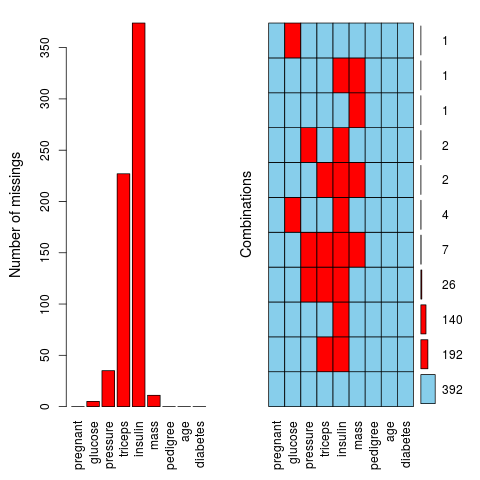

In [46]:
%%R 

VIM::aggr(PimaIndiansDiabetes2, prop = FALSE, numbers = TRUE)

In [ ]:
%%R -i complete


VIM::aggr(complete, prop = FALSE, numbers = FALSE)

In [64]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()
completeR = pandas2ri.py2ri(complete)
completeR.head()



NameError: name 'PimaIndiansDiabetes2' is not defined